# Données E-commerce 
## Une entreprise tente de décider de concentrer ses efforts sur la application mobile ou sur le site Web

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(rc={'figure.figsize' : (16 , 9)}, font_scale=1.4, style='whitegrid')

In [3]:
df = pd.read_csv("Ecommerce Customers")
df['Length of Membership'] = df['Length of Membership'].astype(int)

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null int32
Yearly Amount Spent     500 non-null float64
dtypes: float64(4), int32(1), object(3)
memory usage: 29.4+ KB


# résumé statistique

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.040000,499.314038
std,0.992563,0.994216,1.010489,1.049095,79.314782
min,29.532429,8.508152,33.913847,0.000000,256.670582
25%,32.341822,11.388153,36.349257,2.000000,445.038277
50%,33.082008,11.983231,37.069367,3.000000,498.887875
75%,33.711985,12.753850,37.716432,4.000000,549.313828
max,36.139662,15.126994,40.005182,6.000000,765.518462


## Comparons le montant annuel dépensé par les clients en fonction du temps passé sur le site Web et du temps passé sur l'application

C:\Users\Yasha\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


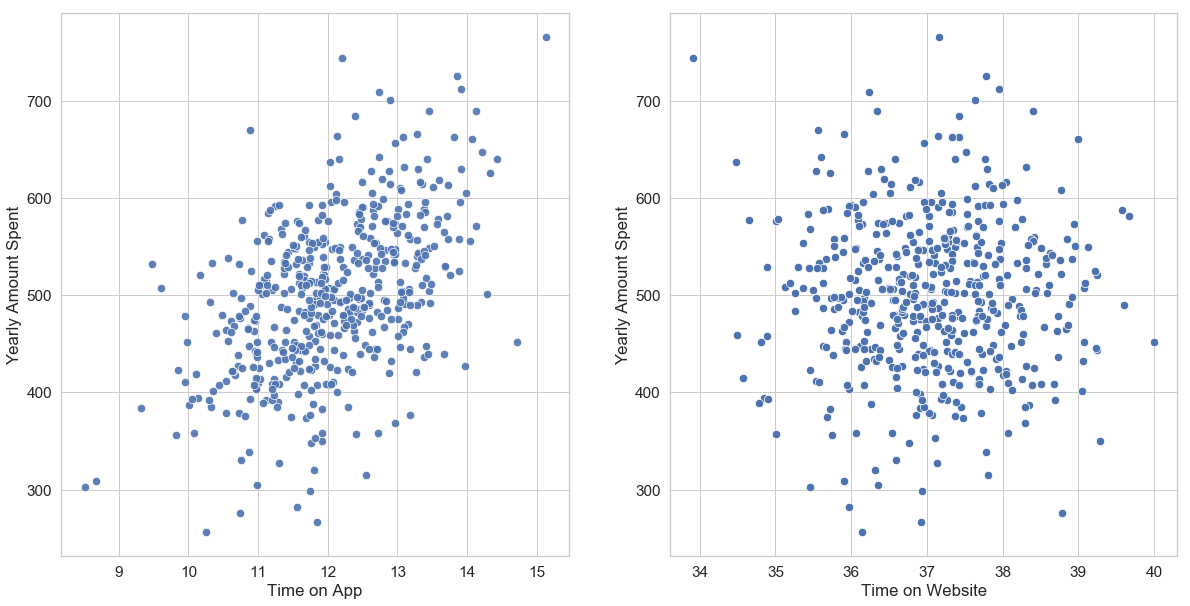

In [7]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches( 20, 10)
sns.scatterplot(data=df  ,x='Time on App' , y='Yearly Amount Spent' ,ax=ax[0],alpha=0.9 , s=70 )
sns.scatterplot(data=df  ,x='Time on Website' , y='Yearly Amount Spent' , 
                ax=ax[1] , s=70  )
fig.show()

# Voyons comment   la durée d'abonnement a une effect sur l'argent dépensé

In [8]:
dd = df.groupby('Length of Membership').sum()

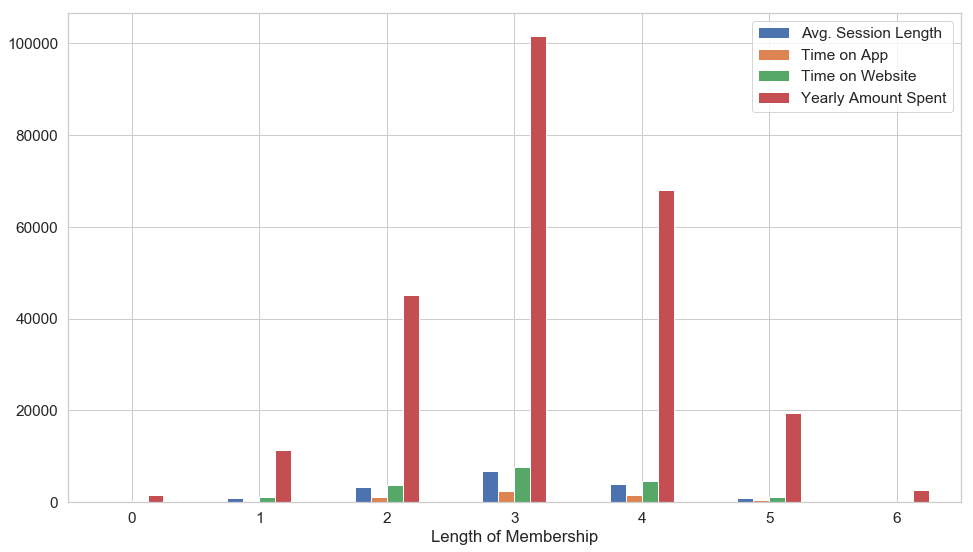

In [9]:
dd.plot(kind='bar' , rot=0)

## corrélation

In [10]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060752,0.355088
Time on App,-0.027826,1.000000,0.082388,0.024515,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.064877,-0.002641
Length of Membership,0.060752,0.024515,-0.064877,1.000000,0.776327
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.776327,1.000000


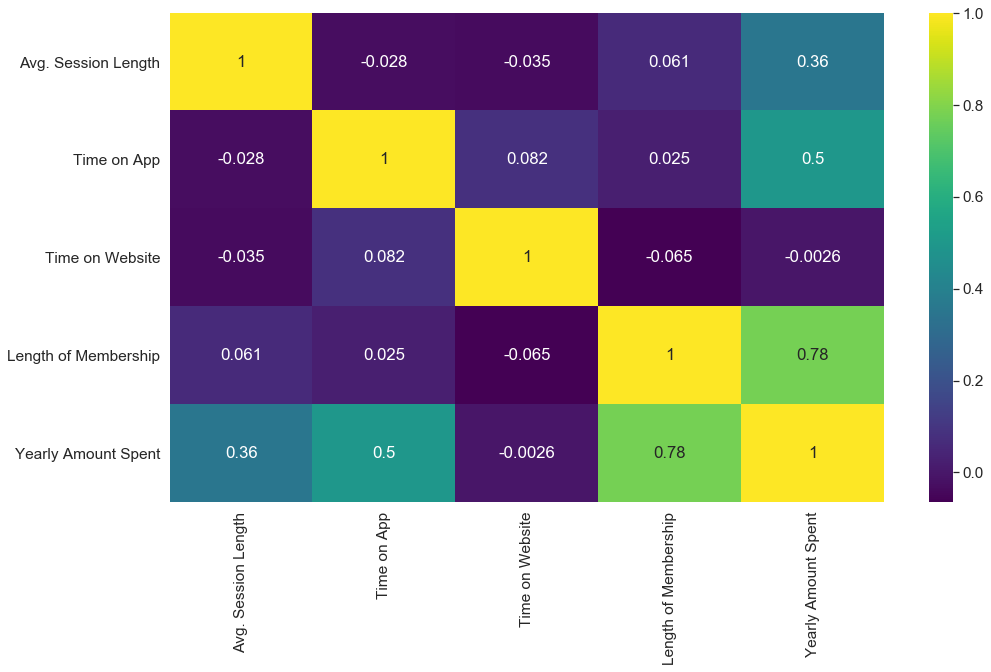

In [11]:
sns.heatmap(df.corr() , annot=True , cmap='viridis')

## corrélation avec le montant annuel dépensé

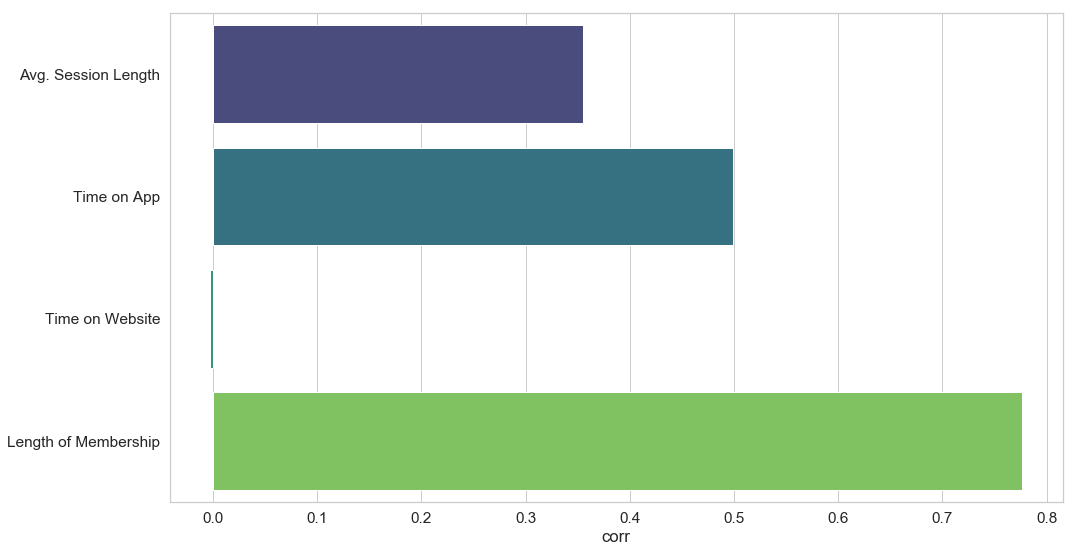

In [12]:
df.drop(columns='Yearly Amount Spent').corrwith(df['Yearly Amount Spent'])
ccc = df.drop(columns='Yearly Amount Spent').corrwith(df['Yearly Amount Spent'])
ccc = pd.DataFrame(ccc , columns=['corr'])
sns.barplot(y=ccc.index , x=ccc['corr'] , palette='viridis')

## durée de l'abonnement est plus corrélée avec montant annuel dépensé


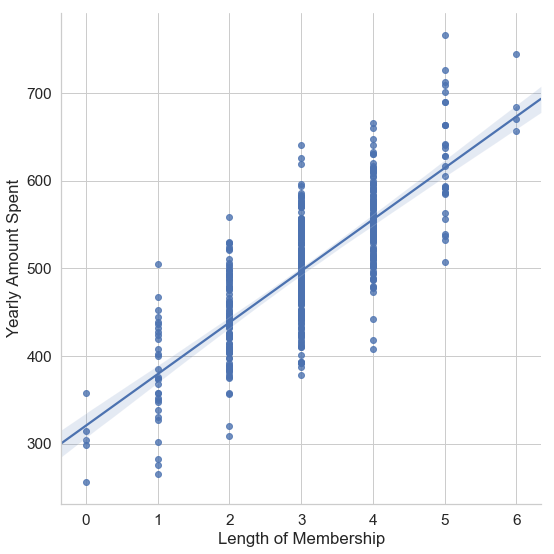

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df , height=8)

## Multiple Linear regression model result

In [14]:
y = df['Yearly Amount Spent']
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()
lm.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
coef = pd.DataFrame(data=lm.coef_ , index=X_train.columns , columns=['Coeff'] )
coef

,Coeff
Avg. Session Length,25.098330
Time on App,39.169890
Time on Website,0.861083
Length of Membership,57.172513



Interpréter les coefficients:

- Si toutes les autres fonctionnalités sont fixes, une augmentation de 1 unité en **Moy. Durée de la session** est associée à une augmentation **de 25.09 dollars des dépenses totales **.
- Si toutes les autres fonctionnalités sont fixes, une augmentation de 1 unité en **Temps sur App** est associée à une augmentation **de 39.16 dollars des dépenses totales **.
- Si toutes les autres fonctionnalités sont fixes, une augmentation de 1 unité en **Temps sur SiteWeb** est associée à une augmentation **de 0.86 dollars des dépenses totales **.
- Si toutes les autres fonctionnalités sont fixes, une augmentation de 1 unité en **Durée d'abonmment** est associée à une augmentation **de 57.17 dollars des dépenses totales **.


il y a deux façons de penser à cela: Développer le site Web pour rattraper les performances de l'application mobile ou développer l'application plus car c'est ce qui fonctionne le mieux.